In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# generate data
n = 100  # number of samples
x = np.linspace(0, 2*np.pi, n)
fs = 1/(x[1]-x[0])  # sampling frequency
f = fs/20  # signal frequency: preserve Nyquist's Theorem

In [3]:
# signal generator
def generate_signal(x, freq, opt='linear_trend+seasonal'):
    if opt == 'linear_trend':
        fx = x 
    elif opt == 'linear_trend+seasonal':
        fx = x  + np.sin(2*np.pi*freq*x)
    elif opt == 'seasonal':
        fx = np.sin(2*np.pi*freq*x)
    elif opt == 'nonlinear_trend+seasonal':
        fx = (x-np.pi)**2 + np.sin(2*np.pi*freq*x)
    else:
        raise ValueError("Unkown opt parameter.")
    return fx

In [4]:
def plot_decomposition(decomposition):
    
    # plot handle
    fig, ax = plt.subplots(figsize=(8, 8), nrows=4)
    
    # original signal
    ax[0].plot(decomposition.observed)
    ax[0].set_title("Signal")
    
    # trend component
    ax[1].plot(decomposition.trend)
    ax[1].set_title("Trend")
    
    # seasonal component
    ax[2].plot(decomposition.seasonal)
    ax[2].set_title("Seasonal")
    
    # residue
    ax[3].plot(decomposition.resid)
    ax[3].set_title("Residue")
    
    # plot configuration
    plt.tight_layout()
    plt.show()

In [5]:
# signal decomposition
n_points_in_period = int(fs/f)
print(f"Number of points per period: {n_points_in_period}")

Number of points per period: 20


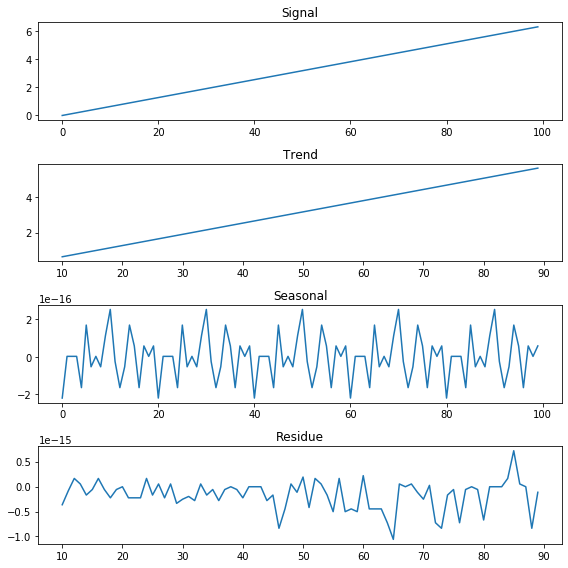

In [6]:
# signal: linear_trend
signal = generate_signal(x, f, opt='linear_trend')
decomposition = seasonal_decompose(signal,
                                   model='additive',
                                   period=n_points_in_period)
plot_decomposition(decomposition)

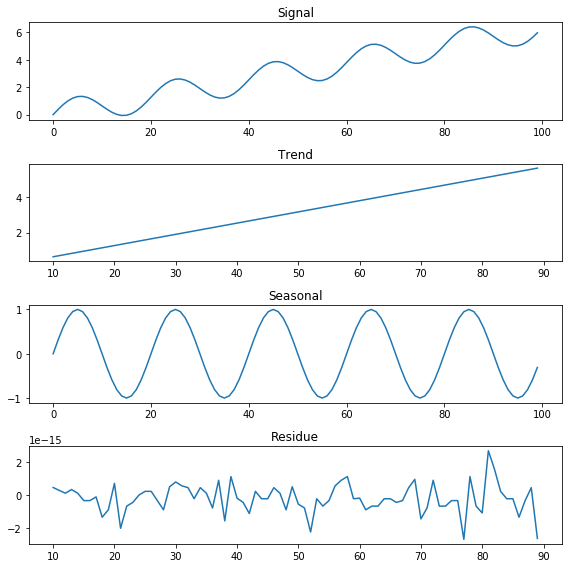

In [7]:
# signal: linear_trend + seasonal
signal = generate_signal(x, f, opt='linear_trend+seasonal')
decomposition = seasonal_decompose(signal,
                                   model='additive',
                                   period=n_points_in_period)
plot_decomposition(decomposition)

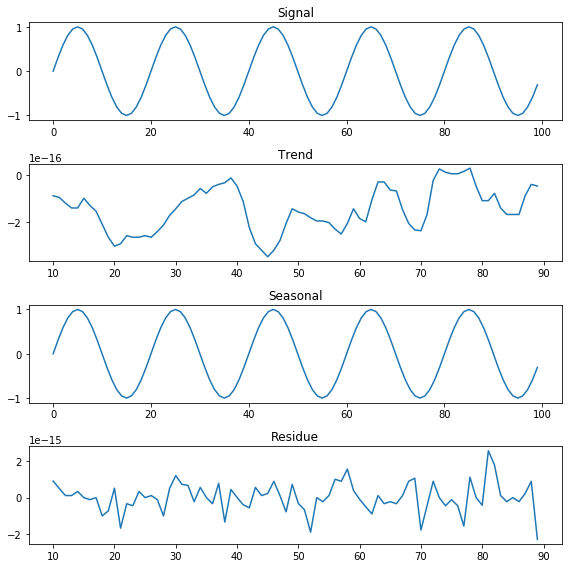

In [8]:
# signal: seasonal
signal = generate_signal(x, f, opt='seasonal')
decomposition = seasonal_decompose(signal,
                                   model='additive',
                                   period=n_points_in_period)
plot_decomposition(decomposition)

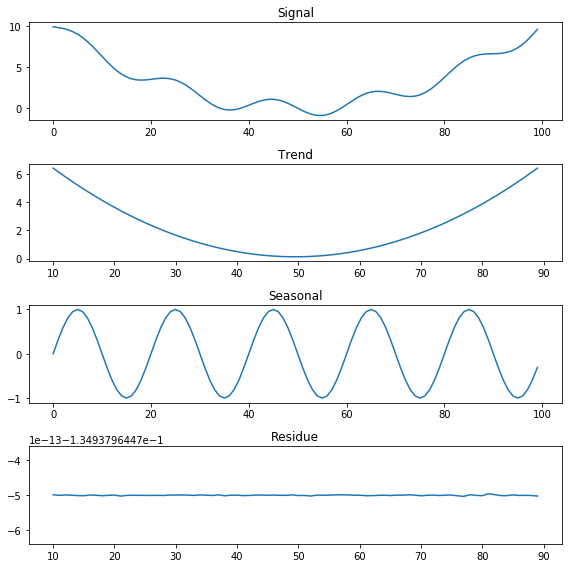

In [9]:
# signal: nonlinear_trend+seasonal
signal = generate_signal(x, f, opt='nonlinear_trend+seasonal')
decomposition = seasonal_decompose(signal,
                                   model='additive',
                                   period=n_points_in_period)
plot_decomposition(decomposition)